In [70]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split

### Preparar datos

In [71]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

[]

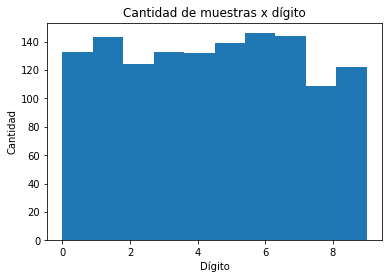

In [72]:
plt.figure()
plt.title("Cantidad de muestras x dígito")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y, bins=10)
plt.plot()

### Visualizando el `dataset`

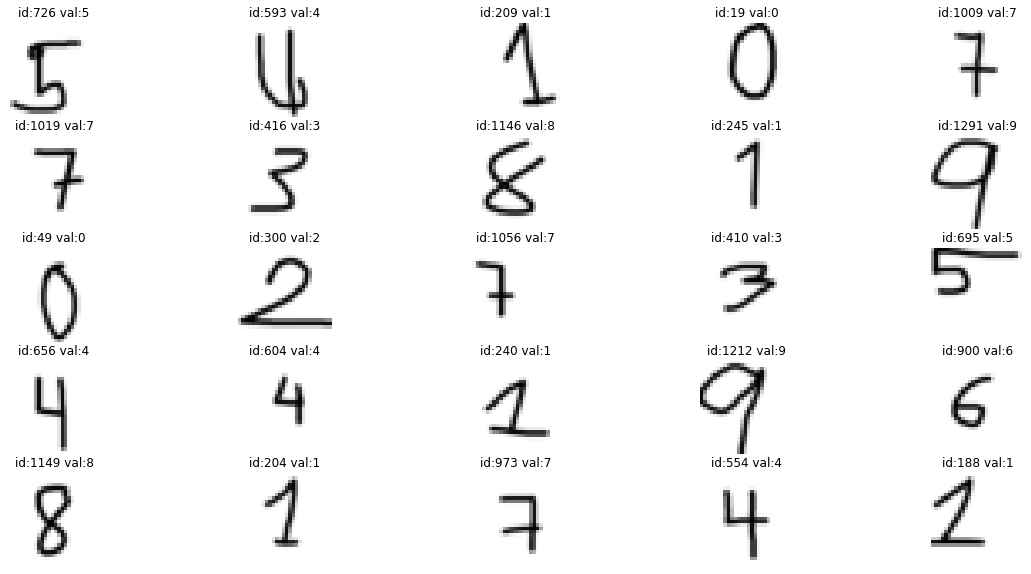

In [73]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

### Split de train-test

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

[]

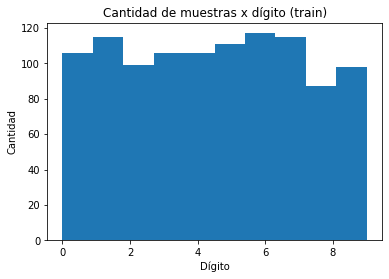

In [75]:
plt.figure()
plt.title("Cantidad de muestras x dígito (train)")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y_train, bins=10)
plt.plot()

[]

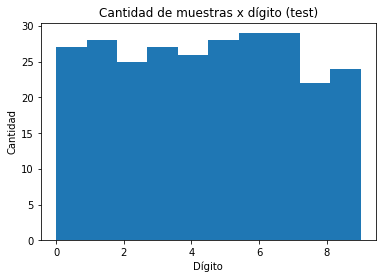

In [76]:
plt.figure()
plt.title("Cantidad de muestras x dígito (test)")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y_test, bins=10)
plt.plot()

In [77]:
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(1060, 28, 28, 1) (265, 28, 28, 1)


## Definimos un modelo

In [78]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD

bs = 16
lr = 0.0005

#Espacio de busqueda
#Cantidad Filtros: 32, 64, 128, 256
#Tamaño del Filtro: 3, 5, 7
#Activaciones: 'relu', 'sigmoid', 'tanh'
#Unidades Dense: 128, 256, 100..
#lr: 0.001, 0.0001, 0.00001, etc
#bs: 8, 16, 32...

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1), padding='same'),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(10, activation='softmax')]) #no modificar

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
# del target a one-hot encoding.

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)            

## Entrenamiento

In [79]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
67/67 [==============================] - 1s 14ms/step - loss: 1.9444 - accuracy: 0.3170 - val_loss: 1.2870 - val_accuracy: 0.5962
Epoch 2/400
67/67 [==============================] - 1s 13ms/step - loss: 0.8872 - accuracy: 0.7349 - val_loss: 0.7293 - val_accuracy: 0.7925
Epoch 3/400
67/67 [==============================] - 1s 13ms/step - loss: 0.5350 - accuracy: 0.8500 - val_loss: 0.5839 - val_accuracy: 0.8189
Epoch 4/400
67/67 [==============================] - 1s 13ms/step - loss: 0.3997 - accuracy: 0.8877 - val_loss: 0.5860 - val_accuracy: 0.8377
Epoch 5/400
67/67 [==============================] - 1s 12ms/step - loss: 0.2858 - accuracy: 0.9255 - val_loss: 0.5965 - val_accuracy: 0.8604
Epoch 6/400
67/67 [==============================] - 1s 14ms/step - loss: 0.2213 - accuracy: 0.9415 - val_loss: 0.5289 - val_accuracy: 0.8604
Epoch 7/400
67/67 [==============================] - 1s 10ms/step - loss: 0.1671 - accuracy: 0.9575 - val_loss: 0.5923 - val_accuracy: 0.8717
Epoch 

In [80]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()

Loss     = 1.6827
Accuracy = 0.8679


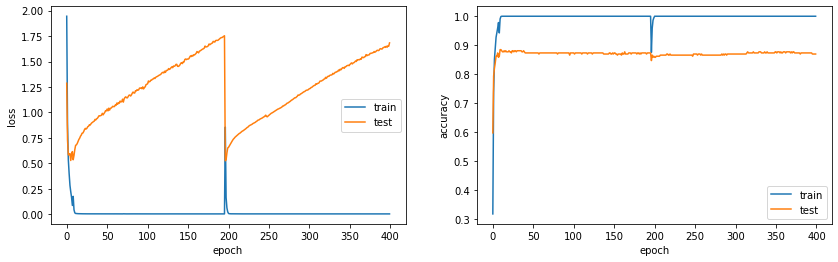

In [81]:
show_results(model, log)

## Probando el modelo

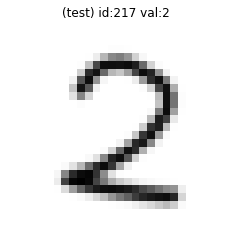

In [82]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

## Usando el modelo entrenado

In [83]:
salida = model.predict(im[None,:,:,:])[0]
salida

array([2.2522457e-30, 1.2499166e-28, 1.0000000e+00, 2.6615823e-21,
       7.9336025e-35, 2.4316628e-25, 0.0000000e+00, 6.0199043e-36,
       3.1427425e-30, 2.2041719e-30], dtype=float32)

[]

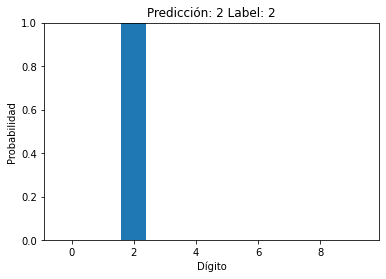

In [84]:
plt.figure()
plt.title("Predicción: {} Label: {}".format(salida.argmax(), label ))
plt.ylabel("Probabilidad")
plt.xlabel("Dígito")
plt.ylim([0,1])
plt.bar(np.arange(10), salida)
plt.plot()